In [56]:
%matplotlib inline

from cosima_cookbook import build_index, get_nc_variable
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import dask.diagnostics
import joblib

In [57]:
memory = joblib.Memory(cachedir='.')

In [2]:
expts = ['gfdl_nyf_1080_cp','gfdl_nyf_1080_SH','gfdl_nyf_1080_PI','gfdl_nyf_1080_UP']

# Transport

In [58]:
@memory.cache
def calc_transport(expt):
    "Calculate the vertically integrate transport at time 0"
    
    tx_trans=get_nc_variable(expt, 'ocean.nc','tx_trans', 
                             time_units='days since 1900-01-01')

    tx_trans_inz=tx_trans.sel(yt_ocean=slice(None, -10))\
                     .sel(xu_ocean=slice(0, 60))\
                     .isel(time=0)\
                     .sum('st_ocean')

    streamfunction = tx_trans_inz.cumsum('yt_ocean')

    streamfunction0 = streamfunction.sel(xu_ocean=20, yt_ocean=-10, method='nearest')

    transport = - (streamfunction - streamfunction0)
    
    transport = transport.compute()
    
    return transport

In [64]:
%%time
transport = calc_transport(expts[0])

CPU times: user 4 ms, sys: 3 ms, total: 7 ms
Wall time: 6.78 ms


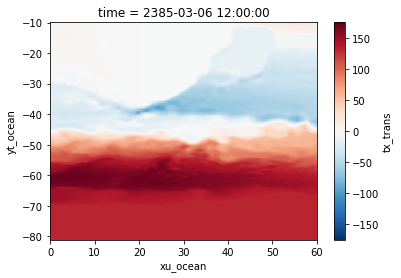

In [53]:
transport.plot()

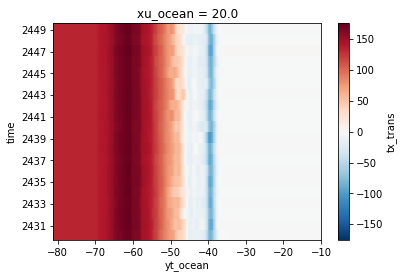

In [30]:
transport.sel(xu_ocean=20, method='nearest').plot()

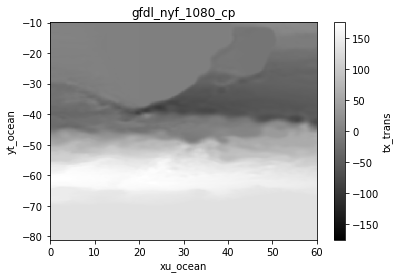

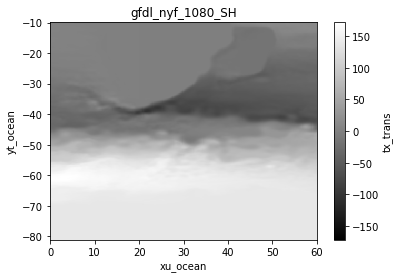

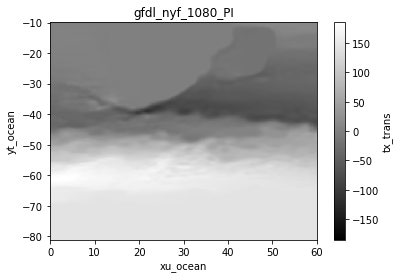

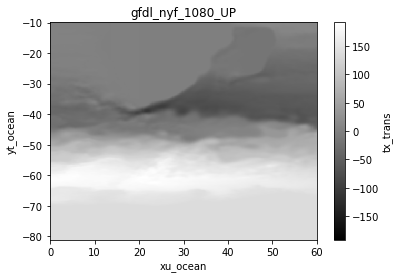

In [72]:
for expt in expts:
    transport = calc_transport(expt)
    
    plt.figure()
    transport.plot(cmap=plt.cm.gray)
    plt.title(expt)
    

In [57]:
#get the tx tranport
tx_trans1=get_nc_variable(exp1,'ocean.nc','tx_trans', time_units='days since 1900-01-01')
tx_trans2=get_nc_variable(exp2,'ocean.nc','tx_trans', time_units='days since 1900-01-01')
tx_trans3=get_nc_variable(exp3,'ocean.nc','tx_trans', time_units='days since 1900-01-01')
tx_trans4=get_nc_variable(exp4,'ocean.nc','tx_trans', time_units='days since 1900-01-01')

#calculation of tx transport mean in z direction
tx_trans_inz1=tx_trans1.sum('st_ocean')
tx_trans_inz2=tx_trans2.sum('st_ocean')
tx_trans_inz3=tx_trans3.sum('st_ocean')
tx_trans_inz4=tx_trans4.sum('st_ocean')

#select the area to calculate the tranport
output1 = tx_trans_inz1\
                .sel(yt_ocean=slice(None, -10))\
                .sel(xu_ocean=slice(0, 60))\
                .cumsum('yt_ocean').compute()
output2 = tx_trans_inz2\
                .sel(yt_ocean=slice(None, -10))\
                .sel(xu_ocean=slice(0, 60))\
                .cumsum('yt_ocean').compute()
output3 = tx_trans_inz3\
                .sel(yt_ocean=slice(None, -10))\
                .sel(xu_ocean=slice(0, 60))\
                .cumsum('yt_ocean').compute()
output4 = tx_trans_inz4\
                .sel(yt_ocean=slice(None, -10))\
                .sel(xu_ocean=slice(0, 60))\
                .cumsum('yt_ocean').compute()

#streamfunction for the resample of time (annual)
str1 = -(output1 - output1[0,-1,80]).compute()
str2 = -(output2 - output2[0,-1,80]).compute()
str3 = -(output3 - output3[0,-1,80]).compute()
str4 = -(output4 - output4[0,-1,80]).compute()

Using 65 ncfiles
chunking info ('time', 'st_ocean', 'yt_ocean', 'xu_ocean') [1, 10, 216, 288]
Using 50 ncfiles
chunking info ('time', 'st_ocean', 'yt_ocean', 'xu_ocean') [1, 10, 216, 288]
Using 50 ncfiles
chunking info ('time', 'st_ocean', 'yt_ocean', 'xu_ocean') [1, 10, 216, 288]
Using 50 ncfiles
chunking info ('time', 'st_ocean', 'yt_ocean', 'xu_ocean') [1, 10, 216, 288]


KeyboardInterrupt: 

## ACC

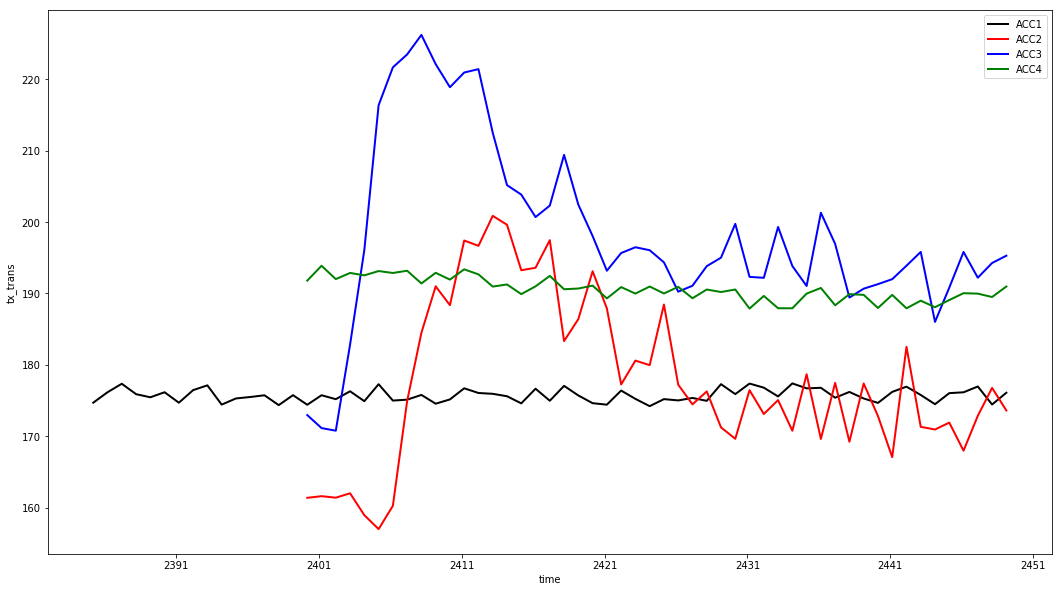

In [13]:
#Antarctica Circumpolar Current(ACC)
ACC1=str1.sel(xu_ocean=slice(20, 30)).max(dim='yt_ocean').max(dim='xu_ocean')
ACC2=str2.sel(xu_ocean=slice(20, 30)).max(dim='yt_ocean').max(dim='xu_ocean')
ACC3=str3.sel(xu_ocean=slice(20, 30)).max(dim='yt_ocean').max(dim='xu_ocean')
ACC4=str4.sel(xu_ocean=slice(20, 30)).max(dim='yt_ocean').max(dim='xu_ocean')

#Subgyre strength
SubGyre_Strength1=-str1.sel(xu_ocean=slice(30, 60)).min(dim='yt_ocean').min(dim='xu_ocean')
SubGyre_Strength2=-str2.sel(xu_ocean=slice(30, 60)).min(dim='yt_ocean').min(dim='xu_ocean')
SubGyre_Strength3=-str3.sel(xu_ocean=slice(30, 60)).min(dim='yt_ocean').min(dim='xu_ocean')
SubGyre_Strength4=-str4.sel(xu_ocean=slice(30, 60)).min(dim='yt_ocean').min(dim='xu_ocean')

#Agulhas Current(AC)
AC1=-str1.sel(xu_ocean=32).min(dim='yt_ocean')
AC2=-str2.sel(xu_ocean=32).min(dim='yt_ocean')
AC3=-str3.sel(xu_ocean=32).min(dim='yt_ocean')
AC4=-str4.sel(xu_ocean=32).min(dim='yt_ocean')

#plot
plt.figure(figsize=(18,10))
ACC1.plot(color='black',label='ACC1', linewidth=2)
ACC2.plot(color='red',label='ACC2', linewidth=2)
ACC3.plot(color='blue',label='ACC3', linewidth=2)
ACC4.plot(color='green',label='ACC4', linewidth=2)
plt.legend(loc=0)

## Subgyre strength

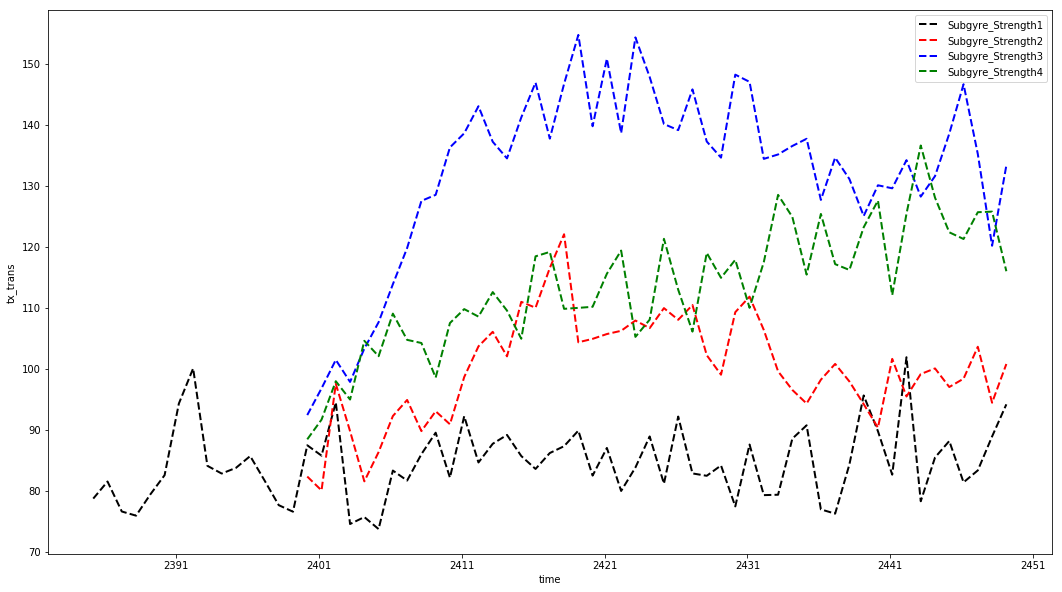

In [14]:
plt.figure(figsize=(18,10))
SubGyre_Strength1.plot(color='black',linewidth=2,label='Subgyre_Strength1',linestyle='--')
SubGyre_Strength2.plot(color='red',linewidth=2,label='Subgyre_Strength2',linestyle='--')
SubGyre_Strength3.plot(color='blue',linewidth=2,label='Subgyre_Strength3',linestyle='--')
SubGyre_Strength4.plot(color='green',linewidth=2,label='Subgyre_Strength4',linestyle='--')
plt.legend(loc=0)

# AC

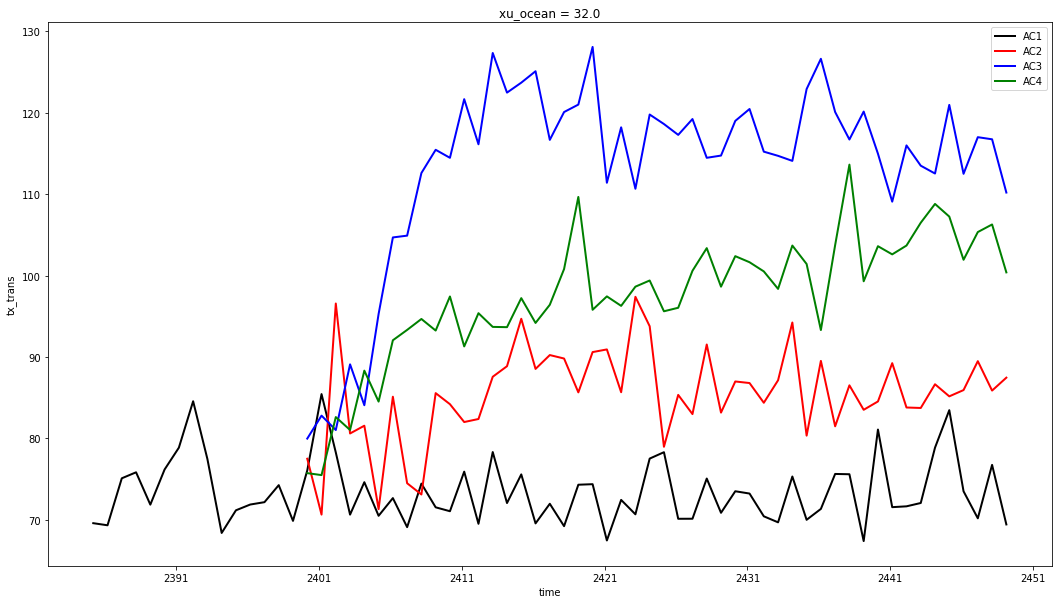

In [15]:
plt.figure(figsize=(18,10))
AC1.plot(color='black',linewidth=2,label='AC1')
AC2.plot(color='red',linewidth=2,label='AC2')
AC3.plot(color='blue',linewidth=2,label='AC3')
AC4.plot(color='green',linewidth=2,label='AC4')
#plt.axvspan('1924', '1934', alpha=0.2, color='pink')
#plt.axvspan('1934', '1937', alpha=0.2, color='yellow')
#plt.axvspan('1937', '2000', alpha=0.1, color='green')
plt.legend(loc=0)

# AL by using density

Using 65 ncfiles
chunking info ('time', 'st_ocean', 'yt_ocean', 'xt_ocean') [1, 10, 216, 288]
Using 50 ncfiles
chunking info ('time', 'st_ocean', 'yt_ocean', 'xt_ocean') [1, 10, 216, 288]
Using 50 ncfiles
chunking info ('time', 'st_ocean', 'yt_ocean', 'xt_ocean') [1, 10, 216, 288]
Using 50 ncfiles
chunking info ('time', 'st_ocean', 'yt_ocean', 'xt_ocean') [1, 10, 216, 288]


/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in less_equal
  if not reflexive


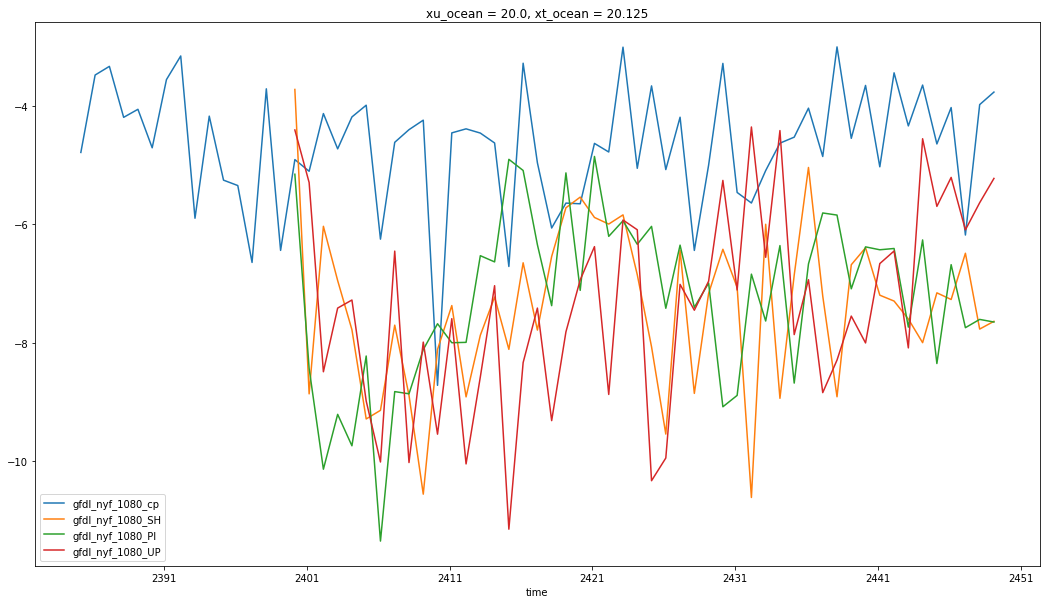

In [16]:
rho1=get_nc_variable(exp1,'ocean.nc','pot_rho_0', time_units='days since 1900-01-01')
rho2=get_nc_variable(exp2,'ocean.nc','pot_rho_0', time_units='days since 1900-01-01')
rho3=get_nc_variable(exp3,'ocean.nc','pot_rho_0', time_units='days since 1900-01-01')
rho4=get_nc_variable(exp4,'ocean.nc','pot_rho_0', time_units='days since 1900-01-01')

# the density distribution around the AL area
al_rho1 = rho1\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xt_ocean=20, method='nearest')\
                .isel(time=slice(None,100))\
                .compute()
al_rho2 = rho2\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xt_ocean=20, method='nearest')\
                .isel(time=slice(None,100))\
                .compute()
al_rho3 = rho3\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xt_ocean=20, method='nearest')\
                .isel(time=slice(None,100))\
                .compute()
al_rho4 = rho4\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xt_ocean=20, method='nearest')\
                .isel(time=slice(None,100))\
                .compute()
                
#the transport distribution around AL area   
al_tx_trans1 = tx_trans1\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xu_ocean=20)\
                .isel(time=slice(None,100))\
                .compute()
al_tx_trans2 = tx_trans2\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xu_ocean=20)\
                .isel(time=slice(None,100))\
                .compute()
al_tx_trans3 = tx_trans3\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xu_ocean=20)\
                .isel(time=slice(None,100))\
                .compute()
al_tx_trans4 = tx_trans4\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xu_ocean=20)\
                .isel(time=slice(None,100))\
                .compute()

#masking the density delvel less than 1026.5 to be 0
al_mask1 = (al_rho1 <= 1026.5)
al_mask2 = (al_rho2 <= 1026.5)
al_mask3 = (al_rho3 <= 1026.5)
al_mask4 = (al_rho4 <= 1026.5)

#calculating the transport by using the mask of density
al_trans1 = (al_tx_trans1 * al_mask1).sum('yt_ocean').sum('st_ocean')
al_trans2 = (al_tx_trans2 * al_mask2).sum('yt_ocean').sum('st_ocean')
al_trans3 = (al_tx_trans3 * al_mask3).sum('yt_ocean').sum('st_ocean')
al_trans4 = (al_tx_trans4 * al_mask4).sum('yt_ocean').sum('st_ocean')

#plotting the transport by using the mask of density
plt.figure(figsize=(18,10))
al_trans1.plot.line(label='gfdl_nyf_1080_cp')
al_trans2.plot.line(label='gfdl_nyf_1080_SH')
al_trans3.plot.line(label='gfdl_nyf_1080_PI')
al_trans4.plot.line(label='gfdl_nyf_1080_UP')
plt.legend(loc=0)


## Do the time mean to plot 2 D graph

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in less_equal
  if not reflexive
/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


(1000, 0)

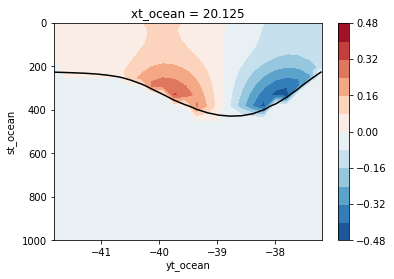

In [18]:
al_tx_trans1_1 = tx_trans1\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xu_ocean=20)\
                .isel(time=slice(None,100)).mean(dim='time')\
                .compute()
al_tx_trans1_2 = tx_trans2\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xu_ocean=20)\
                .isel(time=slice(None,100)).mean(dim='time')\
                .compute()
al_tx_trans1_3 = tx_trans3\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xu_ocean=20)\
                .isel(time=slice(None,100)).mean(dim='time')\
                .compute()                
al_tx_trans1_4 = tx_trans4\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xu_ocean=20)\
                .isel(time=slice(None,100)).mean(dim='time')\
                .compute()                
                
al_rho1_1 = rho1\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xt_ocean=20, method='nearest')\
                .isel(time=slice(None,100)).mean(dim='time')\
                .compute()
al_mask1_1 = (al_rho1_1 <= 1026.5)
(al_tx_trans1_1 * al_mask1_1).plot.contourf(levels=15)
al_rho1_1.plot.contour(levels=[1026.5], colors='k')
plt.ylim(1000, 0)

# AL by using salinity

Using 65 ncfiles
chunking info ('time', 'st_ocean', 'yt_ocean', 'xt_ocean') [1, 10, 216, 288]
Using 50 ncfiles
chunking info ('time', 'st_ocean', 'yt_ocean', 'xt_ocean') [1, 10, 216, 288]
Using 50 ncfiles
chunking info ('time', 'st_ocean', 'yt_ocean', 'xt_ocean') [1, 10, 216, 288]
Using 50 ncfiles
chunking info ('time', 'st_ocean', 'yt_ocean', 'xt_ocean') [1, 10, 216, 288]


/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in greater_equal
  if not reflexive


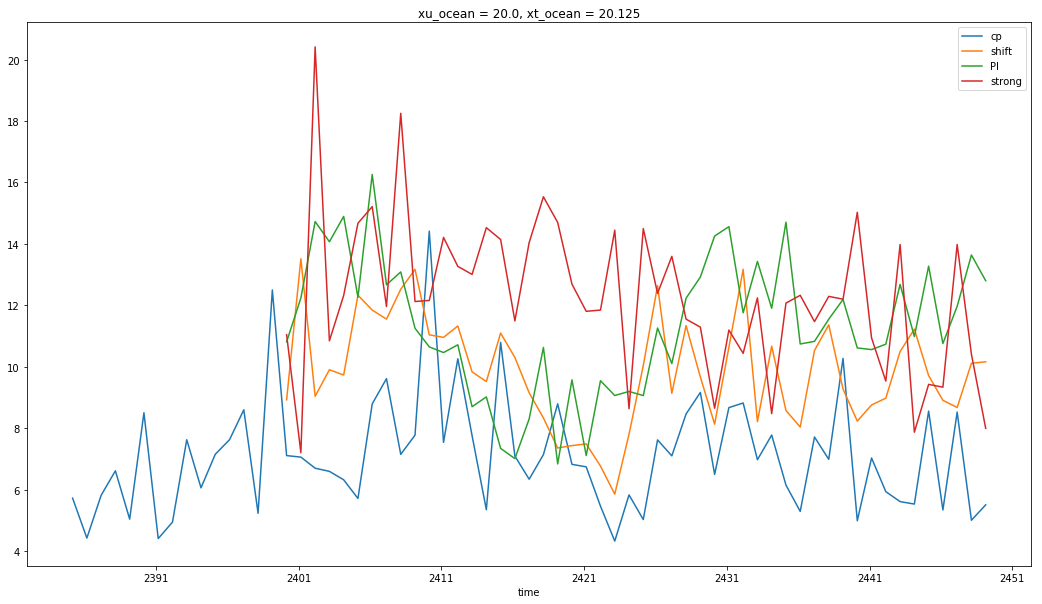

In [19]:
salt1=get_nc_variable(exp1,'ocean.nc','salt', time_units='days since 1900-01-01')
salt2=get_nc_variable(exp2,'ocean.nc','salt', time_units='days since 1900-01-01')
salt3=get_nc_variable(exp3,'ocean.nc','salt', time_units='days since 1900-01-01')
salt4=get_nc_variable(exp4,'ocean.nc','salt', time_units='days since 1900-01-01')

#the salinity distribution around Al area                
al_salt1 = salt1\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xt_ocean=20, method='nearest')\
                .isel(time=slice(None,100))\
                .compute()
al_salt2 = salt2\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xt_ocean=20, method='nearest')\
                .isel(time=slice(None,100))\
                .compute()
al_salt3 = salt3\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xt_ocean=20, method='nearest')\
                .isel(time=slice(None,100))\
                .compute()
al_salt4 = salt4\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xt_ocean=20, method='nearest')\
                .isel(time=slice(None,100))\
                .compute()

#masking the salt delvel less than 35 to be 0
al_mask11 = (al_salt1 >= 35)
al_mask22 = (al_salt2 >= 35)
al_mask33 = (al_salt3 >= 35)
al_mask44 = (al_salt4 >= 35)

#calculating the transport by using the mask of salinity
al_trans11 = -(al_tx_trans1 * al_mask11).sum('yt_ocean').sum('st_ocean')
al_trans22 = -(al_tx_trans2 * al_mask22).sum('yt_ocean').sum('st_ocean')
al_trans33 = -(al_tx_trans3 * al_mask33).sum('yt_ocean').sum('st_ocean')
al_trans44 = -(al_tx_trans4 * al_mask44).sum('yt_ocean').sum('st_ocean')

#plotting the transport by using the mask of salinity
plt.figure(figsize=(18,10))
al_trans11.plot.line(label='cp')
al_trans22.plot.line(label='shift')
al_trans33.plot.line(label='PI')
al_trans44.plot.line(label='strong')
plt.legend(loc=0)


## Do the time mean to plot 2 D graph

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in greater_equal
  if not reflexive


(1000, 0)

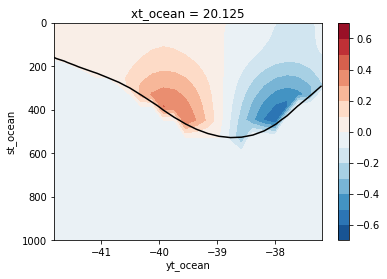

In [20]:
al_salt1_1 = salt1\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xt_ocean=20, method='nearest')\
                .isel(time=slice(None,100)).mean(dim='time')\
                .compute()
al_salt1_2 = salt2\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xt_ocean=20, method='nearest')\
                .isel(time=slice(None,100)).mean(dim='time')\
                .compute()
al_salt1_3 = salt3\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xt_ocean=20, method='nearest')\
                .isel(time=slice(None,100)).mean(dim='time')\
                .compute()
al_salt1_4 = salt4\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xt_ocean=20, method='nearest')\
                .isel(time=slice(None,100)).mean(dim='time')\
                .compute()                
al_mask11_1 = (al_salt1_1 >= 35) 
al_mask11_2 = (al_salt1_2 >= 35) 
al_mask11_3 = (al_salt1_3 >= 35) 
al_mask11_4 = (al_salt1_4 >= 35) 
(al_tx_trans1_1 * al_mask11_1).plot.contourf(levels=15)
al_salt1_1.plot.contour(levels=[35], colors='k')
plt.ylim(1000, 0)

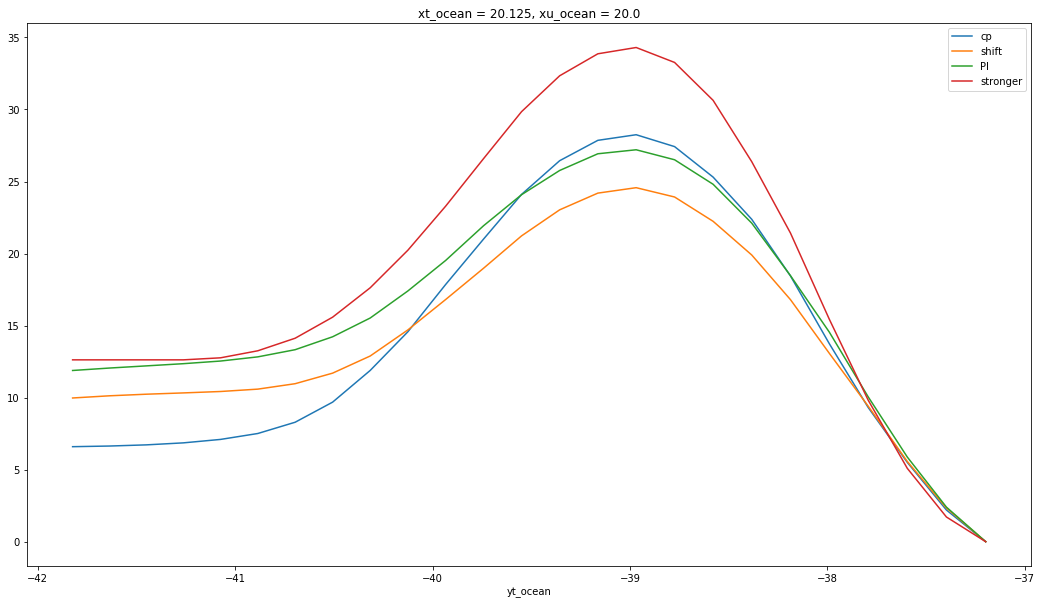

In [21]:
temp1 = (al_mask11_1*al_tx_trans1_1).cumsum('yt_ocean').sum('st_ocean')
temp2 = (al_mask11_2*al_tx_trans1_2).cumsum('yt_ocean').sum('st_ocean')
temp3 = (al_mask11_3*al_tx_trans1_3).cumsum('yt_ocean').sum('st_ocean')
temp4 = (al_mask11_4*al_tx_trans1_4).cumsum('yt_ocean').sum('st_ocean')
temp11=temp1-temp1[-1]
temp22=temp2-temp2[-1]
temp33=temp3-temp3[-1]
temp44=temp4-temp4[-1]
plt.figure(figsize=(18,10))
temp11.plot(label='cp')
temp22.plot(label='shift')
temp33.plot(label='PI')
temp44.plot(label='stronger')
plt.legend(loc=0)

# Wind stress for 5 days experiment

Using 1 ncfiles
chunking info ('time', 'yu_ocean', 'xu_ocean') [1, 540, 720]
Using 1 ncfiles
chunking info ('time', 'yu_ocean', 'xu_ocean') [1, 540, 720]
Using 1 ncfiles
chunking info ('time', 'yu_ocean', 'xu_ocean') [1, 540, 720]
Using 1 ncfiles
chunking info ('time', 'yu_ocean', 'xu_ocean') [1, 540, 720]


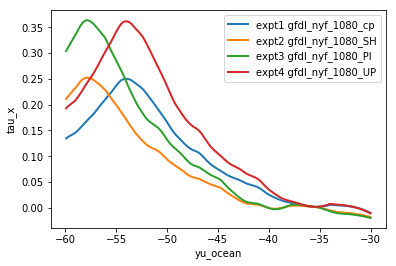

In [22]:
tau_x1=get_nc_variable(exp1,'ocean__501_103.nc','tau_x', time_units='days since 1900-01-01')
wind_stress1=tau_x1.mean(dim='time').sel(yu_ocean=slice(-60,-30)).isel(xu_ocean=slice(1000,1400))\
    .mean(dim='xu_ocean')
tau_x2=get_nc_variable(exp2,'ocean__501_103.nc','tau_x', time_units='days since 1900-01-01')
wind_stress2=tau_x2.mean(dim='time').sel(yu_ocean=slice(-60,-30)).isel(xu_ocean=slice(1000,1400))\
    .mean(dim='xu_ocean')
tau_x3=get_nc_variable(exp3,'ocean__501_103.nc','tau_x', time_units='days since 1900-01-01')
wind_stress3=tau_x3.mean(dim='time').sel(yu_ocean=slice(-60,-30)).isel(xu_ocean=slice(1000,1400))\
    .mean(dim='xu_ocean')
tau_x4=get_nc_variable(exp4,'ocean__501_103.nc','tau_x', time_units='days since 1900-01-01')
wind_stress4=tau_x4.mean(dim='time').sel(yu_ocean=slice(-60,-30)).isel(xu_ocean=slice(1000,1400))\
    .mean(dim='xu_ocean')

# wind stress plot
wind_stress1.plot(label='expt1 gfdl_nyf_1080_cp', linewidth=2)
wind_stress2.plot(label='expt2 gfdl_nyf_1080_SH', linewidth=2)
wind_stress3.plot(label='expt3 gfdl_nyf_1080_PI', linewidth=2)
wind_stress4.plot(label='expt4 gfdl_nyf_1080_UP', linewidth=2)
plt.legend(loc=0)

# Robust the result by altering the xt_ocean slice of reference experiment

In [73]:
@memory.cache
def calc_transport_slice(expt, x):
    "Calculate the vertically integrated transport along a slice xu_ocean=x0"
    
    tx_trans=get_nc_variable(expt, 'ocean.nc','tx_trans', 
                             time_units='days since 1900-01-01')

    tx_trans_inz=tx_trans.sel(yt_ocean=slice(None, -10))\
                     .sel(xu_ocean=slice(0, 60))\
                     .sum('st_ocean')

    streamfunction = tx_trans_inz.cumsum('yt_ocean')

    streamfunction0 = streamfunction.sel(xu_ocean=20, yt_ocean=-10, method='nearest')

    transport = - (streamfunction - streamfunction0)
    
    transport = transport.sel(yt_ocean=slice(-42, -37))\
                .sel(xu_ocean=x).compute()
    
    return transport  

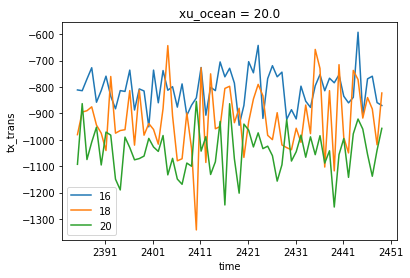

In [79]:
for x in [16, 18, 20]:
    for expt in expts:
        calc_transport_slice(expts[0], x).sum('yt_ocean').plot(label=expt + ' ' + str(x))
    
plt.legend()

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in greater_equal
  if not reflexive


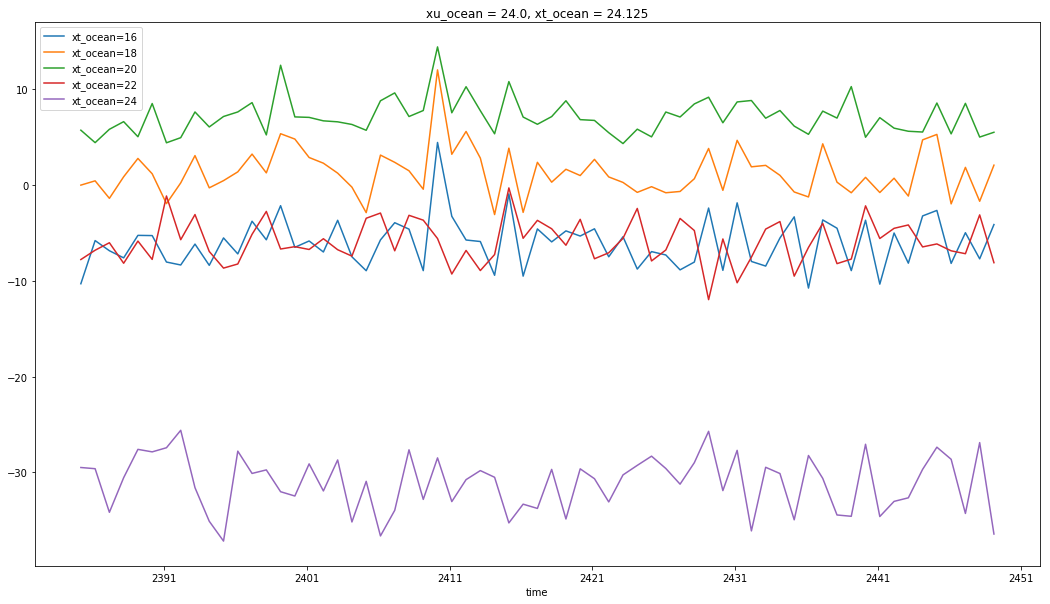

In [26]:
al_tx_trans1_16 = tx_trans1\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xu_ocean=16)\
                .isel(time=slice(None,100))\
                .compute()
al_tx_trans1_18 = tx_trans1\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xu_ocean=18)\
                .isel(time=slice(None,100))\
                .compute()
al_tx_trans1_20 = tx_trans1\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xu_ocean=20)\
                .isel(time=slice(None,100))\
                .compute()
al_tx_trans1_22 = tx_trans1\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xu_ocean=22)\
                .isel(time=slice(None,100))\
                .compute()
al_tx_trans1_24 = tx_trans1\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xu_ocean=24)\
                .isel(time=slice(None,100))\
                .compute()
                
al_salt1_16 = salt1\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xt_ocean=16, method='nearest')\
                .isel(time=slice(None,100))\
                .compute()                
al_salt1_18 = salt1\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xt_ocean=18, method='nearest')\
                .isel(time=slice(None,100))\
                .compute()
al_salt1_20 = salt1\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xt_ocean=20, method='nearest')\
                .isel(time=slice(None,100))\
                .compute()
al_salt1_22 = salt1\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xt_ocean=22, method='nearest')\
                .isel(time=slice(None,100))\
                .compute()
al_salt1_24 = salt1\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xt_ocean=24, method='nearest')\
                .isel(time=slice(None,100))\
                .compute()
                
al_mask11_16 = (al_salt1_16 >= 35) 
al_mask11_18 = (al_salt1_18 >= 35)
al_mask11_20 = (al_salt1_20 >= 35)
al_mask11_22 = (al_salt1_22 >= 35)
al_mask11_24 = (al_salt1_24 >= 35)

#calculating the transport by using the mask of salinity
al_trans11_16 = -(al_tx_trans1_16 * al_mask11_16).sum('yt_ocean').sum('st_ocean')
al_trans11_18 = -(al_tx_trans1_18 * al_mask11_18).sum('yt_ocean').sum('st_ocean')
al_trans11_20 = -(al_tx_trans1_20 * al_mask11_20).sum('yt_ocean').sum('st_ocean')
al_trans11_22 = -(al_tx_trans1_22 * al_mask11_22).sum('yt_ocean').sum('st_ocean')
al_trans11_24 = -(al_tx_trans1_24 * al_mask11_24).sum('yt_ocean').sum('st_ocean')

#plotting the transport by using the mask of salinity
plt.figure(figsize=(18,10))
al_trans11_16.plot.line(label='xt_ocean=16')
al_trans11_18.plot.line(label='xt_ocean=18')
al_trans11_20.plot.line(label='xt_ocean=20')
al_trans11_22.plot.line(label='xt_ocean=22')
al_trans11_24.plot.line(label='xt_ocean=24')
plt.legend(loc=0)

# Robust the result by altering the salinity level of reference experiment


/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in greater_equal
  if not reflexive


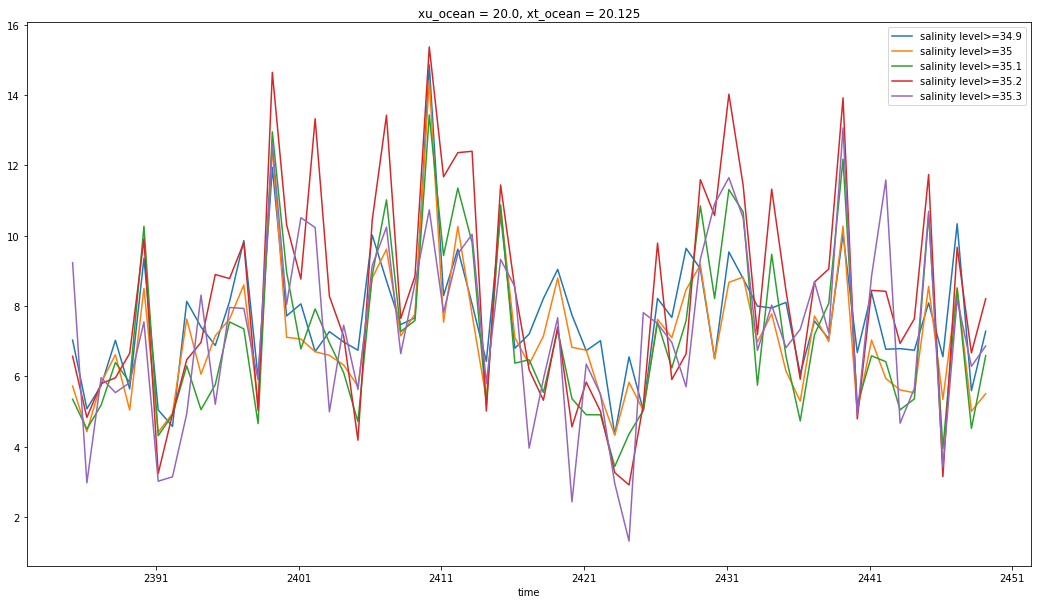

In [24]:
al_mask11_20_34d9 = (al_salt1_20 >= 34.9) 
al_mask11_20_35 = (al_salt1_20 >= 35)
al_mask11_20_35d1 = (al_salt1_20 >= 35.1)
al_mask11_20_35d2 = (al_salt1_20 >= 35.2)
al_mask11_20_35d3 = (al_salt1_20 >= 35.3)

#calculating the transport by using the mask of salinity
al_trans11_20_34d9 = -(al_tx_trans1_20 * al_mask11_20_34d9).sum('yt_ocean').sum('st_ocean')
al_trans11_20_35 = -(al_tx_trans1_20 * al_mask11_20_35).sum('yt_ocean').sum('st_ocean')
al_trans11_20_35d1 = -(al_tx_trans1_20 * al_mask11_20_35d1).sum('yt_ocean').sum('st_ocean')
al_trans11_20_35d2 = -(al_tx_trans1_20 * al_mask11_20_35d2).sum('yt_ocean').sum('st_ocean')
al_trans11_20_35d3 = -(al_tx_trans1_20 * al_mask11_20_35d3).sum('yt_ocean').sum('st_ocean')

#plotting the transport by using the mask of salinity
plt.figure(figsize=(18,10))
al_trans11_20_34d9.plot.line(label='salinity level>=34.9')
al_trans11_20_35.plot.line(label='salinity level>=35')
al_trans11_20_35d1.plot.line(label='salinity level>=35.1')
al_trans11_20_35d2.plot.line(label='salinity level>=35.2')
al_trans11_20_35d3.plot.line(label='salinity level>=35.3')
plt.legend(loc=0)

# Robust the result by altering the yt_ocean range of reference experiment


/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in greater_equal
  if not reflexive


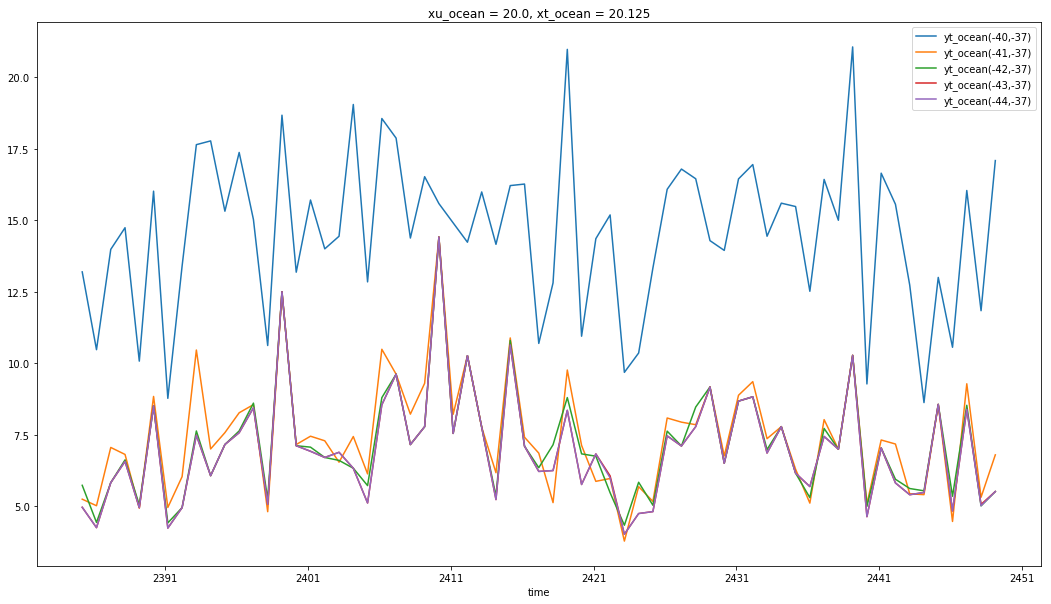

In [27]:
al_tx_trans1_20_40 = tx_trans1\
                .sel(yt_ocean=slice(-40, -37))\
                .sel(xu_ocean=20)\
                .isel(time=slice(None,100))\
                .compute()
al_tx_trans1_20_41 = tx_trans1\
                .sel(yt_ocean=slice(-41, -37))\
                .sel(xu_ocean=20)\
                .isel(time=slice(None,100))\
                .compute()
al_tx_trans1_20_42 = tx_trans1\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xu_ocean=20)\
                .isel(time=slice(None,100))\
                .compute()
al_tx_trans1_20_43 = tx_trans1\
                .sel(yt_ocean=slice(-43, -37))\
                .sel(xu_ocean=20)\
                .isel(time=slice(None,100))\
                .compute()
al_tx_trans1_20_44 = tx_trans1\
                .sel(yt_ocean=slice(-44, -37))\
                .sel(xu_ocean=20)\
                .isel(time=slice(None,100))\
                .compute()
                
al_salt1_20_40 = salt1\
                .sel(yt_ocean=slice(-40, -37))\
                .sel(xt_ocean=20, method='nearest')\
                .isel(time=slice(None,100))\
                .compute()                
al_salt1_20_41 = salt1\
                .sel(yt_ocean=slice(-41, -37))\
                .sel(xt_ocean=20, method='nearest')\
                .isel(time=slice(None,100))\
                .compute()
al_salt1_20_42 = salt1\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xt_ocean=20, method='nearest')\
                .isel(time=slice(None,100))\
                .compute()
al_salt1_20_43 = salt1\
                .sel(yt_ocean=slice(-43, -37))\
                .sel(xt_ocean=20, method='nearest')\
                .isel(time=slice(None,100))\
                .compute()
al_salt1_20_44 = salt1\
                .sel(yt_ocean=slice(-44, -37))\
                .sel(xt_ocean=20, method='nearest')\
                .isel(time=slice(None,100))\
                .compute()
                
al_mask11_20_40 = (al_salt1_20_40 >= 35) 
al_mask11_20_41 = (al_salt1_20_41 >= 35)
al_mask11_20_42 = (al_salt1_20_42 >= 35)
al_mask11_20_43 = (al_salt1_20_43 >= 35)
al_mask11_20_44 = (al_salt1_20_44 >= 35)

#calculating the transport by using the mask of salinity
al_trans11_20_40 = -(al_tx_trans1_20_40 * al_mask11_20_40).sum('yt_ocean').sum('st_ocean')
al_trans11_20_41 = -(al_tx_trans1_20_41 * al_mask11_20_41).sum('yt_ocean').sum('st_ocean')
al_trans11_20_42 = -(al_tx_trans1_20_42 * al_mask11_20_42).sum('yt_ocean').sum('st_ocean')
al_trans11_20_43 = -(al_tx_trans1_20_43 * al_mask11_20_43).sum('yt_ocean').sum('st_ocean')
al_trans11_20_44 = -(al_tx_trans1_20_44 * al_mask11_20_44).sum('yt_ocean').sum('st_ocean')

#plotting the transport by using the mask of salinity
plt.figure(figsize=(18,10))
al_trans11_20_40.plot.line(label='yt_ocean(-40,-37)')
al_trans11_20_41.plot.line(label='yt_ocean(-41,-37)')
al_trans11_20_42.plot.line(label='yt_ocean(-42,-37)')
al_trans11_20_43.plot.line(label='yt_ocean(-43,-37)')
al_trans11_20_44.plot.line(label='yt_ocean(-44,-37)')
plt.legend(loc=0)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in greater_equal
  if not reflexive


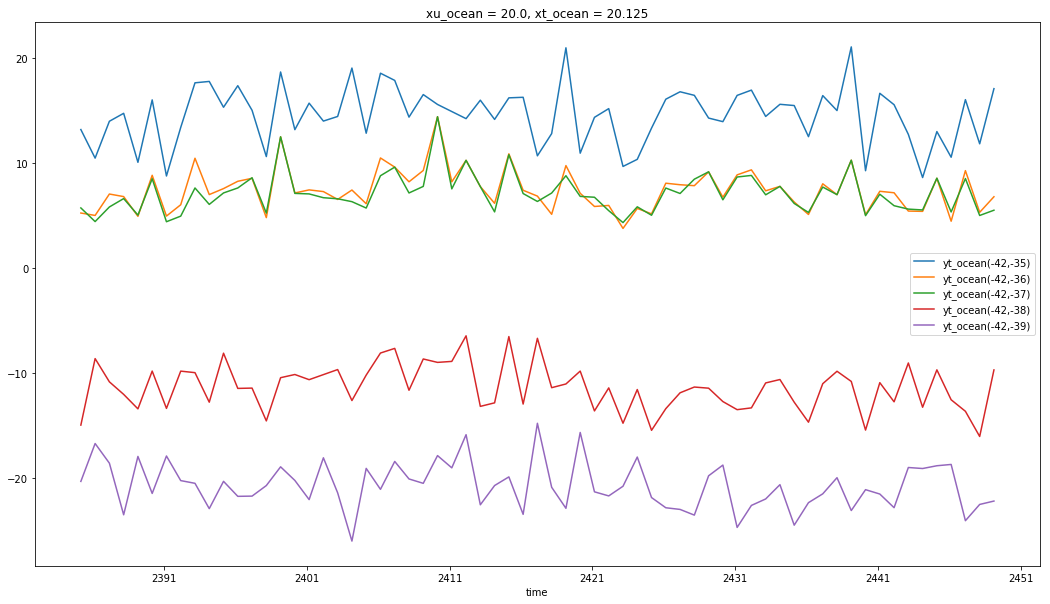

In [30]:
al_tx_trans1_20_42_35 = tx_trans1\
                .sel(yt_ocean=slice(-42, -35))\
                .sel(xu_ocean=20)\
                .isel(time=slice(None,100))\
                .compute()
al_tx_trans1_20_42_36 = tx_trans1\
                .sel(yt_ocean=slice(-42, -36))\
                .sel(xu_ocean=20)\
                .isel(time=slice(None,100))\
                .compute()
al_tx_trans1_20_42_37 = tx_trans1\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xu_ocean=20)\
                .isel(time=slice(None,100))\
                .compute()
al_tx_trans1_20_42_38 = tx_trans1\
                .sel(yt_ocean=slice(-42, -38))\
                .sel(xu_ocean=20)\
                .isel(time=slice(None,100))\
                .compute()
al_tx_trans1_20_42_39 = tx_trans1\
                .sel(yt_ocean=slice(-42, -39))\
                .sel(xu_ocean=20)\
                .isel(time=slice(None,100))\
                .compute()
                
al_salt1_20_42_35 = salt1\
                .sel(yt_ocean=slice(-42, -35))\
                .sel(xt_ocean=20, method='nearest')\
                .isel(time=slice(None,100))\
                .compute()                
al_salt1_20_42_36 = salt1\
                .sel(yt_ocean=slice(-42, -36))\
                .sel(xt_ocean=20, method='nearest')\
                .isel(time=slice(None,100))\
                .compute()
al_salt1_20_42_37 = salt1\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xt_ocean=20, method='nearest')\
                .isel(time=slice(None,100))\
                .compute()
al_salt1_20_42_38 = salt1\
                .sel(yt_ocean=slice(-42, -38))\
                .sel(xt_ocean=20, method='nearest')\
                .isel(time=slice(None,100))\
                .compute()
al_salt1_20_42_39 = salt1\
                .sel(yt_ocean=slice(-42, -39))\
                .sel(xt_ocean=20, method='nearest')\
                .isel(time=slice(None,100))\
                .compute()
                
al_mask11_20_42_35 = (al_salt1_20_40 >= 35) 
al_mask11_20_42_36 = (al_salt1_20_41 >= 35)
al_mask11_20_42_37 = (al_salt1_20_42 >= 35)
al_mask11_20_42_38 = (al_salt1_20_43 >= 35)
al_mask11_20_42_39 = (al_salt1_20_44 >= 35)

#calculating the transport by using the mask of salinity
al_trans11_20_42_35 = -(al_tx_trans1_20_42_35 * al_mask11_20_42_35).sum('yt_ocean').sum('st_ocean')
al_trans11_20_42_36 = -(al_tx_trans1_20_42_36 * al_mask11_20_42_36).sum('yt_ocean').sum('st_ocean')
al_trans11_20_42_37 = -(al_tx_trans1_20_42_37 * al_mask11_20_42_37).sum('yt_ocean').sum('st_ocean')
al_trans11_20_42_38 = -(al_tx_trans1_20_42_38 * al_mask11_20_42_38).sum('yt_ocean').sum('st_ocean')
al_trans11_20_42_39 = -(al_tx_trans1_20_42_39 * al_mask11_20_42_39).sum('yt_ocean').sum('st_ocean')

#plotting the transport by using the mask of salinity
plt.figure(figsize=(18,10))
al_trans11_20_42_35.plot.line(label='yt_ocean(-42,-35)')
al_trans11_20_42_36.plot.line(label='yt_ocean(-42,-36)')
al_trans11_20_42_37.plot.line(label='yt_ocean(-42,-37)')
al_trans11_20_42_38.plot.line(label='yt_ocean(-42,-38)')
al_trans11_20_42_39.plot.line(label='yt_ocean(-42,-39)')
plt.legend(loc=0)